# Wrangling, Analyzing and Visualizing "WeRateDogs" Twitter data

**By Robin Jean Charles Hocepied**

## Introduction

Data never comes clean and neat, as humans, we need to spend time with it in order to understand it and then be able to round the dirty corners so we can deep dive into insightful analysis. The aim of this project is to wrangle **WeRateDogs** Twitter data, which is a unique Twitter account that rates people's dogs with funny comments, in order to reveal insights from the data and create a trustworthy analysis. Data wrangling refers to the process of cleaning, restructuring and enriching the raw data available into a simpler and hands-on format.

The Twitter archive is great, but it only contains very basic tweet information. Additional gathering is needed to complete the analysis. By using Python and its libraries, I will gather data from a variety of sources, assess its quality and tidiness, to then be able to deep dive into some statistics and analysis.

***Data description***

* The **WeRateDogs** Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which has been used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo), to make this Twitter archive "enhanced." Of the 5000+ tweets, they have been filtered for tweets with ratings only (there are 2356). These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.However, the ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. So, i'll need to assess and clean these columns, to use them for analysis and visualization.


* The **tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. It is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).


* The **Tweet JSON** data written to its own line in a file called tweet_json.txt file, including information about tweet's retweet count and favorite ("like") count. 

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    </ul>
<ul>
<li><a href="#gathering">I - Gathering Data </a></li>
<ol>
<li><a href="#archive">Twitter Archive</a></li>
<li><a href="#image">Image Predictions</a></li>
<li><a href="#json">Tweet JSON</a></li>
</ol>
</ul>
<ul>
<li><a href="#assessing">II - Assessing</a></li>
<ol>
<li><a href="#archive1">Twitter Archive</a></li>
<li><a href="#image1">Image Predictions</a></li>
<li><a href="#json1">Tweet JSON</a></li>
</ol>
</ul>
<ul>
<li><a href="#clean">III - Cleaning</a></li>
    <ol>
<li><a href="#general">General</a></li>
<li><a href="#archive2">Twitter Archive</a></li>
<li><a href="#image2">Image Predictions</a></li>
<li><a href="#json2">Tweet JSON</a></li>
</ol>
</ul>
<ul>  
<li><a href="#analyze">IV - Analyzing and Visualizing </a></li>
</ul>

<a id='gathering'></a>
## I - Gathering Data

Gathering data is the first step in data wrangling. I will obtain data by downloading a TSV file from the internet, csv file, json file, etc. and importing that data into the programming environment (Jupyter Notebook).

First of all, it's necessary to import all the packages that could be useful for my analysis.

In [221]:
# Import all the packages needed for my analysis

import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

%matplotlib inline

<a id='archive'></a>
### 1 - Twitter Archive

In [222]:
#Load WeRateDogs Twitter archive Data

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

<a id='image'></a>
### 2 - Image Predictions


In [223]:
# Use requests library to download tsv file from Udacity's server

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

# Save the file to the computer

with open('image-predictions.tsv', mode='wb') as file:
        file.write(r.content)
        
# Read TSV file

image_predictions=pd.read_csv('image-predictions.tsv', sep="\t")

<a id='json'></a>
### 2 - Tweet JSON


In [224]:
#  Read tweet's JSON data line by line

selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
# Create a dictionary with the JSON data

        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
        
# Create dataFrame from list of dictionaries

tweets_json = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])

<a id='assessing'></a>
## II - Assessing Data

After gathering the data, the second step is to assess the data embedded in the three datasets, visually and programmatically. The main aim of this section is to find and assess the dirty data spreaded in the three DataFrames. The cleaning process need to bear in mind the four following concepts: Completeness, Validity, Accuracy and Consistency and tidiness . 

<a id='archive1'></a>
### 1 - Twitter Archive

In [225]:
# Print first five rows of the dataset

twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [226]:
# Short summary of the Twitter archive table and display of the missing values

twitter_archive.info(), twitter_archive.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(None, tweet_id                         0
 in_reply_to_status_id         2278
 in_reply_to_user_id           2278
 timestamp                        0
 source                           0
 text                             0
 retweeted_status_id           2175
 retweeted_status_user_id      2175
 retweeted_status_timestamp    2175
 expanded_urls                   59
 rating_numerator                 0
 rating_denominator               0
 name                             0
 doggo                            0
 floofer                          0
 pupper                           0
 puppo                            0
 dtype: int64)

In [227]:
# Analysis of the columns tweet_id and timestamp 

twitter_archive['tweet_id'].duplicated().sum(), type(twitter_archive.timestamp[0])

(0, str)

In [228]:
# Expanded URLs deep dive - Part 1 (Count if Retweets or Replies)

sum(twitter_archive.expanded_urls.isnull() & 
    (twitter_archive.in_reply_to_status_id.notnull()| \
     twitter_archive.retweeted_status_id.notnull()))

56

In [229]:
# Expanded URLs deep dive - Part 2 (Count if Original Tweets)

sum(twitter_archive.expanded_urls.isnull() & 
    twitter_archive.in_reply_to_status_id.isnull()&
     twitter_archive.retweeted_status_id.isnull())

3

In [230]:
# Expanded URLs deep dive - Part 3 (Display Original Tweets)

twitter_archive[twitter_archive.expanded_urls.isnull() & 
    twitter_archive.in_reply_to_status_id.isnull()&
     twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [231]:
# Verify if the missing Original Tweets are in the "image_predictions" table

urls_missing=[828361771580813312, 785515384317313025,696518437233913856]
find_index=image_predictions.tweet_id.isin(urls_missing)
sum(find_index)

0

In [232]:
# Verify if the missing Original Tweets are in the "tweets_json" table

urls_missing=[828361771580813312, 785515384317313025,696518437233913856]
find_index=tweets_json.tweet_id.isin(urls_missing)
sum(find_index)

3

In [233]:
#Verify if we have an image URL in the tweets_json table

tweets_json.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [234]:
# Print descriptive statistics for the Rating Numerator and Denominator

twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [235]:
# Number of occurance for each Rating Denominator

twitter_archive['rating_denominator'].value_counts().head(20)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [236]:
# Count Tweets that have a Denominator diff than 10

sum(twitter_archive.rating_denominator!=10)

23

In [237]:
# Number of occurance for each Rating Numerator

twitter_archive['rating_numerator'].value_counts().head(20) 

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
Name: rating_numerator, dtype: int64

In [238]:
# Find incorrect numerators

twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]\
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,681340665377193984,I've been told there's a slight possibility he...,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26,10


In [239]:
# Ranking of the Name column

twitter_archive['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
Buddy        7
an           7
Daisy        7
Bailey       7
Stanley      6
Dave         6
Name: name, dtype: int64

In [240]:
# List all names that only showcase lowercase names

erron_names = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[erron_names].name.value_counts().sort_index(), len(twitter_archive[erron_names])

(a               55
 actually         2
 all              1
 an               7
 by               1
 getting          2
 his              1
 incredibly       1
 infuriating      1
 just             4
 life             1
 light            1
 mad              2
 my               1
 not              2
 officially       1
 old              1
 one              4
 quite            4
 space            1
 such             1
 the              8
 this             1
 unacceptable     1
 very             5
 Name: name, dtype: int64, 109)

In [241]:
# Number of occurance of each source

twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<a id='image1'></a>
### 2 - Image Predictions


In [242]:
# Print first five rows of the dataset

image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [243]:
# Short summary of the Image predictions table 

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [244]:
# Count the entries for P1, P2 and P3 that foresee that the prediction is not a breed of dog

image_predictions.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

<a id='json1'></a>
### 3 -  Tweet JSON 

In [245]:
# Print first five rows of the dataset

tweets_json.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [246]:
# Short summary of the Tweet Json table

tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Assessing Overview


**---------------------------------------------------------------------------------------_ Final Remarks on Tidiness (2) _---------------------------------------------------------------------------------**

General

>* (1) Consistency: Three dataframes to be analyzed

1. Twitter Archive

>* (2) Consistency: 4 columns for dog stages (doggo, floofer, pupper, puppo)

2. Image Predictions

>* -

3. Tweet JSON

>* -


**---------------------------------------------------------------------------------------_ Final Remarks on Quality (8) _----------------------------------------------------------------------------------**

1. Twitter Archive

>* (1) Useless Data: 78 replies ('in_reply_to_status_id', 'in_reply_to_user_id')
>* (2) Useless Data: 181 retweets ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')
>* (3) Erroneous Datatypes: 'timestamp' column has a string format and the 'tweet_id' has an integer format
>* (4) Missing Data: 56 missing 'expanded_urls' were identified, three of those were original tweets
>* (5) Out-of-Scope Data: Within the 'rating denominator' column, some values do no respect the basis of denominator of 10
>* (6) Out-of-Scope Data: Within the 'rating numerator' column, some values do no respect the intervals >10 and <15
>* (7) Erroneous Data: 109 names of dogs are mislabelled 


2. Image Predictions

>* (8) Erronneous Data: The prediction dog breeds involves both uppercase and lowercase

3. Tweet JSON

>* -



<a id='assessing'></a>
## II - Cleaning Data

In the section, I will clean all the quality and tidiness issues found in the comments above.


In [247]:
# Copy each of the dataframes before cleaning

twitter_archive_new = twitter_archive.copy()
image_predictions_new = image_predictions.copy()
tweets_json_new = tweets_json.copy()

<a id='general'></a>
### 0 - General

**(1) Tidiness -** Consistency: Three dataframes to be analyzed

`Define` 

Merge the three datasets: a) twitter_archive and image_predictions b) (NEW) df and tweets_json

`Code`

In [248]:
# Merge 'twitter_archive_clean' and 'img_predictions_clean'
df = pd.merge(twitter_archive_new, image_predictions_new,
                                   how = 'inner', on = 'tweet_id')
# Merge 'df_clean' and 'tweets_df_clean'
df = pd.merge(df, tweets_json_new,
                                   how = 'inner', on = 'tweet_id')

`Test`

In [249]:
# Verify merging

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2050 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2050 non-null datetime64[ns]
source                        2050 non-null object
text                          2050 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2050 non-null object
rating_numerator              2050 non-null int64
rating_denominator            2050 non-null int64
name                          2050 non-null object
doggo                         2050 non-null object
floofer                       2050 non-null object
pupper                        2050 non-null object
puppo                         2050 non-null object
jpg_url                      

<a id='archive2'></a>
### 1 - Twitter Archive

**(2) Tidiness -** Consistency: 4 columns for dog stages (doggo, floofer, pupper, puppo)

`Define`

Create one column that gathers the following columns 'doggo', 'floofer','pupper'and 'puppo'. Delete the unused columns afterwards

`Code` 

In [250]:
# Merge into column, replace duplicate data within each item and drop unused columns

df['dog_cat'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df['dog_cat'].replace("NoneNoneNoneNone","None ", inplace=True) 
df['dog_cat'].replace("doggoNoneNoneNone","doggo", inplace=True)
df['dog_cat'].replace("NoneflooferNoneNone","floofer", inplace=True)
df['dog_cat'].replace("NoneNonepupperNone","pupper", inplace=True)
df['dog_cat'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df['dog_cat'].replace("doggoNonepupperNone","doggo and pupper", inplace=True)
df['dog_cat'].replace("doggoflooferNoneNone","dogoo and floofer", inplace=True)
df['dog_cat'].replace("doggoNoneNonepuppo","doggo and puppo", inplace=True)

df.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

`Test` 

In [251]:
df.dog_cat.value_counts()

None                 1753
pupper                210
doggo                  67
puppo                  23
doggo and pupper       11
floofer                 7
dogoo and floofer       1
doggo and puppo         1
Name: dog_cat, dtype: int64

**(1) Quality -** Useless Data: 78 replies ('in_reply_to_status_id', 'in_reply_to_user_id')

`Define`

Remove the 78 replies and only keep the original tweets

`Code`

In [252]:
# Removing columns that aren't needed for the analysis

df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

`Test`

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                      2073 non-null int64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_conf                       2073 

**(2) Quality -** Useless Data: 181 retweets ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

`Define`

Remove the 181 retweets and keep only the original tweets

`Code`

In [254]:
# Removing retweets from dataframe

df=df.drop('retweeted_status_id', axis=1)
df=df.drop('retweeted_status_user_id', axis=1)
df=df.drop('retweeted_status_timestamp', axis=1)

`Test`

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
favorites             2073 non-null int64
retweets              2073 non-null int64

**(3) Quality -** Erroneous Datatypes: 'timestamp' column has a string format and the 'tweet_id' has an integer format

`Define`

Convert Timestamp from string to date datatype and tweet_id column from a number to string value

`Code`

In [256]:
# Convert 'timestamp' type from str to datetime and 'tweet_id' type from int to str

df['timestamp']=pd.to_datetime(df['timestamp'])

df.tweet_id=df.tweet_id.astype(str)

`Test`

In [257]:
# Verify if changes were made

df.timestamp.dtype, type(df.tweet_id[0])

(dtype('<M8[ns]'), str)

**(4) Quality -** Missing Data: 56 missing 'expanded_urls' were identified, three of those were original tweets

`Define`

Drop tweets with missing data

`Code`

In [258]:
# Delete the null values

df=df[df.expanded_urls.notnull()]

`Test`

In [259]:
# Verify if Expanded URLs = Null

df_clean.expanded_urls.isnull().sum().any()

False

**(5) Quality -** Out-of-Scope Data: Within the 'rating denominator' column, some values do no respect the basis of denominator of 10

`Define`

Convert the denominator to float and only keep the rows equal to 10

`Code`

In [260]:
# Convert the data type 'rating_denominator' columns as float and keep only rows equal to 10

df['rating_denominator']= df['rating_denominator'].astype(float)
df = df[(df.rating_denominator == 10)]

`Test`

In [261]:
# Verify if changes were made

df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2055.000000,2055.0,2055.000000,2055.000000,2.055000e+03,2.055000e+03,2055.000000,2055.000000
mean,11.705596,10.0,1.203406,0.594253,1.349953e-01,6.028451e-02,8578.100243,2980.346472
std,40.058908,0.0,0.562101,0.271356,1.007979e-01,5.081368e-02,12132.959055,5065.327011
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,10.000000,10.0,1.000000,0.363272,5.409535e-02,1.608055e-02,1663.000000,633.000000
50%,11.000000,10.0,1.000000,0.587830,1.192430e-01,4.948690e-02,3865.000000,1407.000000
75%,12.000000,10.0,1.000000,0.843799,1.963605e-01,9.203645e-02,10957.000000,3449.500000
max,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


**(6) Quality -** Out-of-Scope Data: Within the 'rating numerator' column, some values do no respect the intervals >10 and <20

`Define`

Keep only rows that fit in between 0 and 20 for the rating numerator

`Code`

In [262]:
# Keep only rows where numerator is between 1-15

df = df[(df.rating_numerator > 0) & (df.rating_numerator < 15)]

`Test`

In [263]:
# Verify if changes were made

df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2047.000000,2047.0,2047.000000,2047.000000,2.047000e+03,2.047000e+03,2047.000000,2047.000000
mean,10.608696,10.0,1.202736,0.594175,1.352105e-01,6.034519e-02,8577.040059,2982.023937
std,2.149765,0.0,0.561412,0.271229,1.008578e-01,5.085934e-02,12145.556707,5073.217656
min,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,10.000000,10.0,1.000000,0.363264,5.417505e-02,1.614795e-02,1657.000000,634.000000
50%,11.000000,10.0,1.000000,0.588230,1.192560e-01,4.947150e-02,3864.000000,1405.000000
75%,12.000000,10.0,1.000000,0.843579,1.964450e-01,9.217055e-02,10957.000000,3449.500000
max,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


**(6.1) Quality -** Out-of-Scope Data: Drop Denominator as it only contains values equal to 10

`Define`

Drop Denominator column as it only contains values equal to 10



`Code`

In [264]:
# Drop column

df.drop(['rating_denominator'], axis = 1, inplace = True)

`Test`

In [265]:
# Verify if changes were made

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id            2047 non-null object
timestamp           2047 non-null datetime64[ns]
source              2047 non-null object
text                2047 non-null object
expanded_urls       2047 non-null object
rating_numerator    2047 non-null int64
name                2047 non-null object
jpg_url             2047 non-null object
img_num             2047 non-null int64
p1                  2047 non-null object
p1_conf             2047 non-null float64
p1_dog              2047 non-null bool
p2                  2047 non-null object
p2_conf             2047 non-null float64
p2_dog              2047 non-null bool
p3                  2047 non-null object
p3_conf             2047 non-null float64
p3_dog              2047 non-null bool
favorites           2047 non-null int64
retweets            2047 non-null int64
dog_cat             2047 non-null object
dtypes: bool(3), datetime64[ns]

**(7) Quality -** Erroneous Data: 109 names of dogs are mislabelled

`Define`

Replace mispelled dog names by NaN

`Code`

In [266]:
# Replace lowercase names by None

dog_lc= df.name.str.islower()
df.loc[(dog_lc), 'name'] = np.NaN
df['name'] = df['name'].replace('None', np.NaN)

`Test`

In [267]:
df.name.head(10), df.name.tail(10)

(0     Phineas
 1       Tilly
 2      Archie
 3       Darla
 4    Franklin
 5         NaN
 6         Jax
 7         NaN
 8        Zoey
 9      Cassie
 Name: name, dtype: object, 2063    NaN
 2064    NaN
 2065    NaN
 2066    NaN
 2067    NaN
 2068    NaN
 2069    NaN
 2070    NaN
 2071    NaN
 2072    NaN
 Name: name, dtype: object)

<a id='image2'></a>
### 2 - Image Predictions


**(8) Quality -** Erronneous Data: The prediction dog breeds involve both uppercase and lowercase

`Define`

Capitalize names in P1, P2 and P3 columns and remove '_'

`Code`

In [268]:
# Remove '_' and capitalize names

df['p1'] = df['p1'].str.replace('_', " ")
df['p2'] = df['p2'].str.replace('_', " ")
df['p3'] = df['p3'].str.replace('_', " ")

df['p1'] = df['p1'].str.title()
df['p2'] = df['p2'].str.title()
df['p3'] = df['p3'].str.title()

`Test`

In [269]:
df[['p1','p2', 'p3']].head(10)

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


<a id='json2'></a>
### 3 -  Tweet JSON 

-

### Store Data

In [270]:
# Store the df in CSV file with name 'twitter_archive_master.csv'

df.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## IV - Analyzing and Visualizing Data

### Summary and statistics

In [271]:
# Make a copy of the new df for analysis

df_final=df.copy()

In [272]:
# Summary of the df

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id            2047 non-null object
timestamp           2047 non-null datetime64[ns]
source              2047 non-null object
text                2047 non-null object
expanded_urls       2047 non-null object
rating_numerator    2047 non-null int64
name                1390 non-null object
jpg_url             2047 non-null object
img_num             2047 non-null int64
p1                  2047 non-null object
p1_conf             2047 non-null float64
p1_dog              2047 non-null bool
p2                  2047 non-null object
p2_conf             2047 non-null float64
p2_dog              2047 non-null bool
p3                  2047 non-null object
p3_conf             2047 non-null float64
p3_dog              2047 non-null bool
favorites           2047 non-null int64
retweets            2047 non-null int64
dog_cat             2047 non-null object
dtypes: bool(3), datetime64[ns]

In [273]:
# Descriptive Statistics

df.describe()

,rating_numerator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2047.000000,2047.000000,2047.000000,2.047000e+03,2.047000e+03,2047.000000,2047.000000
mean,10.608696,1.202736,0.594175,1.352105e-01,6.034519e-02,8577.040059,2982.023937
std,2.149765,0.561412,0.271229,1.008578e-01,5.085934e-02,12145.556707,5073.217656
min,1.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,10.000000,1.000000,0.363264,5.417505e-02,1.614795e-02,1657.000000,634.000000
50%,11.000000,1.000000,0.588230,1.192560e-01,4.947150e-02,3864.000000,1405.000000
75%,12.000000,1.000000,0.843579,1.964450e-01,9.217055e-02,10957.000000,3449.500000
max,14.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,132810.000000,79515.000000


### Insights (3) + Visualization (1)

`(1) What is the monthly number of tweets over the whole period?`

In [274]:
df_final['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    364
2016-01    166
2016-02    109
2016-03    118
2016-04     52
2016-05     56
2016-06     79
2016-07     92
2016-08     63
2016-09     70
2016-10     70
2016-11     69
2016-12     60
2017-01     76
2017-02     67
2017-03     52
2017-04     44
2017-05     46
2017-06     46
2017-07     50
2017-08      2
Name: timestamp, dtype: int64

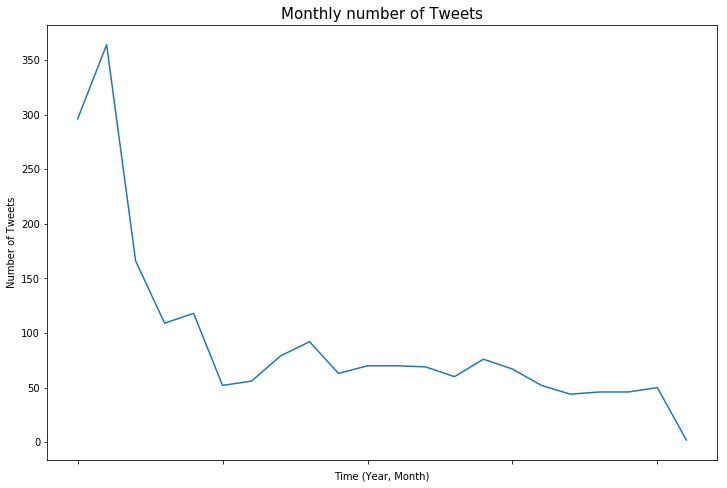

In [275]:

selected_data = df_final['tweet_id'].groupby([df_final['timestamp'].dt.year, df_final['timestamp'].dt.month]).count()
selected_data.plot('line', figsize=(12,8))
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

`(2) What is the distribution of the Denominator Rating?`

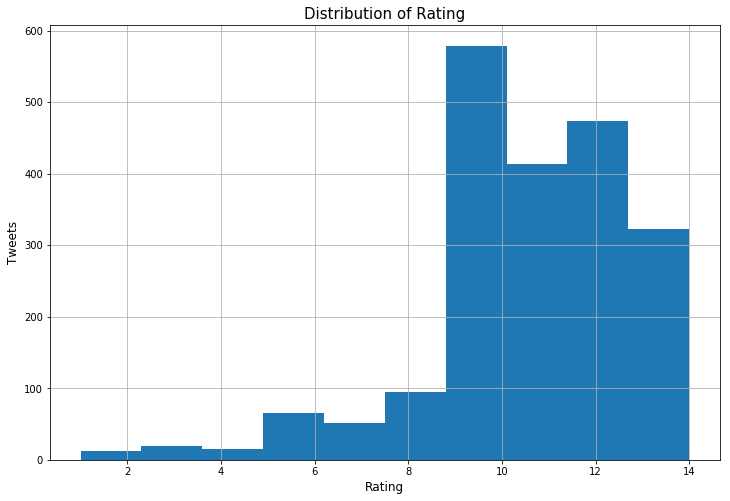

In [276]:
# Distribution via histogram

df_final.rating_numerator.hist(figsize=(12,8));
plt.ylabel('Tweets', size=12)
plt.xlabel('Rating', size=12)
plt.title('Distribution of Rating',color="black", size=15)
plt.show();

`(3) Are retweets and favorites correlated?`

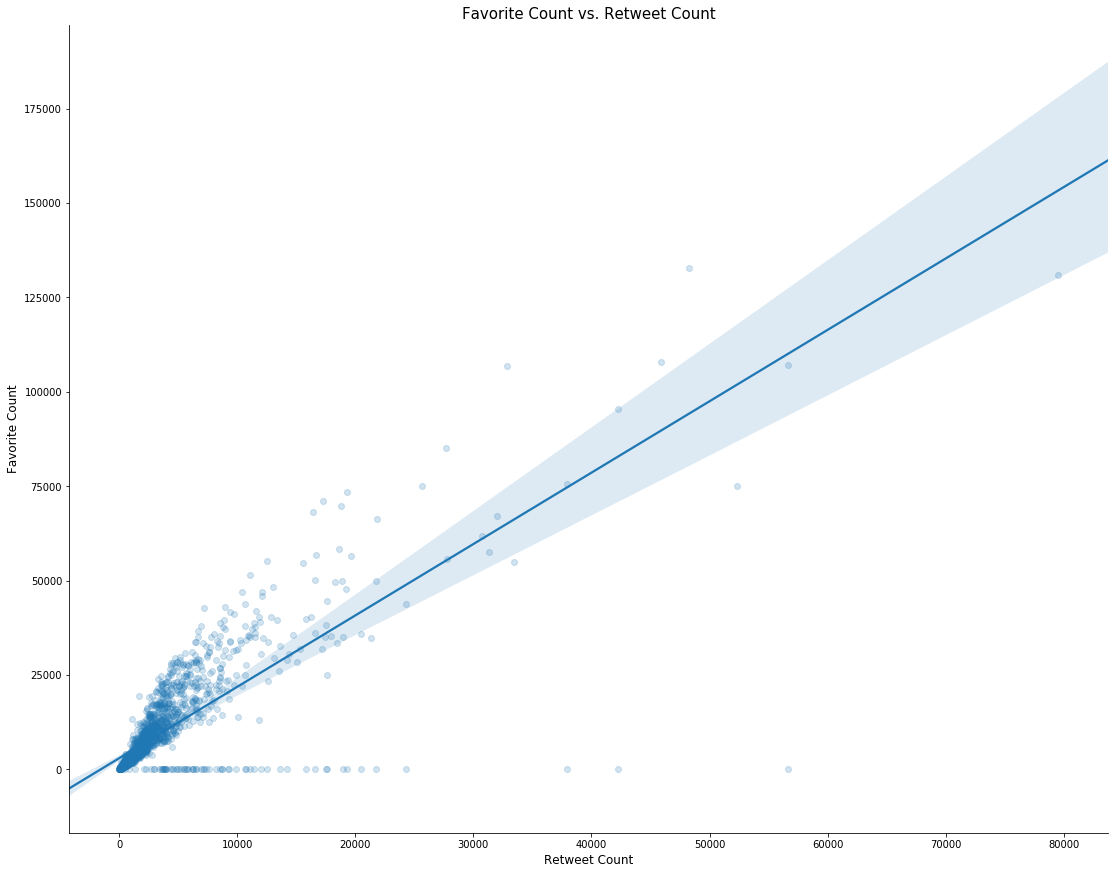

In [277]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweets", 
           y="favorites", 
           data=df_final,
           size = 12,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count', size=15);
plt.xlabel('Retweet Count', size=12);
plt.ylabel('Favorite Count', size=12);

`(4) Most 10 popular names of dogs?`

In [278]:
df_final.name.value_counts().head(10)

Charlie    11
Tucker     10
Lucy       10
Cooper     10
Penny      10
Oliver     10
Winston     8
Bo          8
Sadie       8
Lola        8
Name: name, dtype: int64

### Findings

(1) We clearly see that the number of tweets decreases throughout the period. Almost reaching zero in the last period.

(2) The denominator rating distribution is skewed left, with most of the values contained between 8 and 14.

(3) The correlation is positive and strong, meaning that these two variables move in tandem.

(4) Below the list: 
1. Charlie    11
2. Tucker     10
3. Lucy       10
4. Cooper     10
5. Penny      10
6. Oliver     10
7. Winston     8
8. Bo          8
9. Sadie       8
10. Lola        8